## Predicting the Boston Housing Prices

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes attibutes of the dataset:

-  CRIM - per capita crime rate by town
-  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
-  INDUS - proportion of non-retail business acres per town.
-  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
-  NOX - nitric oxides concentration (parts per 10 million)
-  RM - average number of rooms per dwelling
-  AGE - proportion of owner-occupied units built prior to 1940
-  DIS - weighted distances to five Boston employment centres
-  RAD - index of accessibility to radial highways
-  TAX - full-value property-tax rate per \\$10,000
-  PTRATIO - pupil-teacher ratio by town
-  B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
-  LSTAT - \% lower status of the population
-  MEDV - Median value of owner-occupied homes in $1000's

#### ** CHAS is a categorical variable. So we need to treat it as a dummy variable

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cheking and reading the dataset

In [2]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=features)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Shape of the dataset
data.shape

(506, 14)

## Descriptive statistics of the dataset

In [4]:
from pandas import set_option

df = data
#set_option('precision',2)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Checking outliers

[]

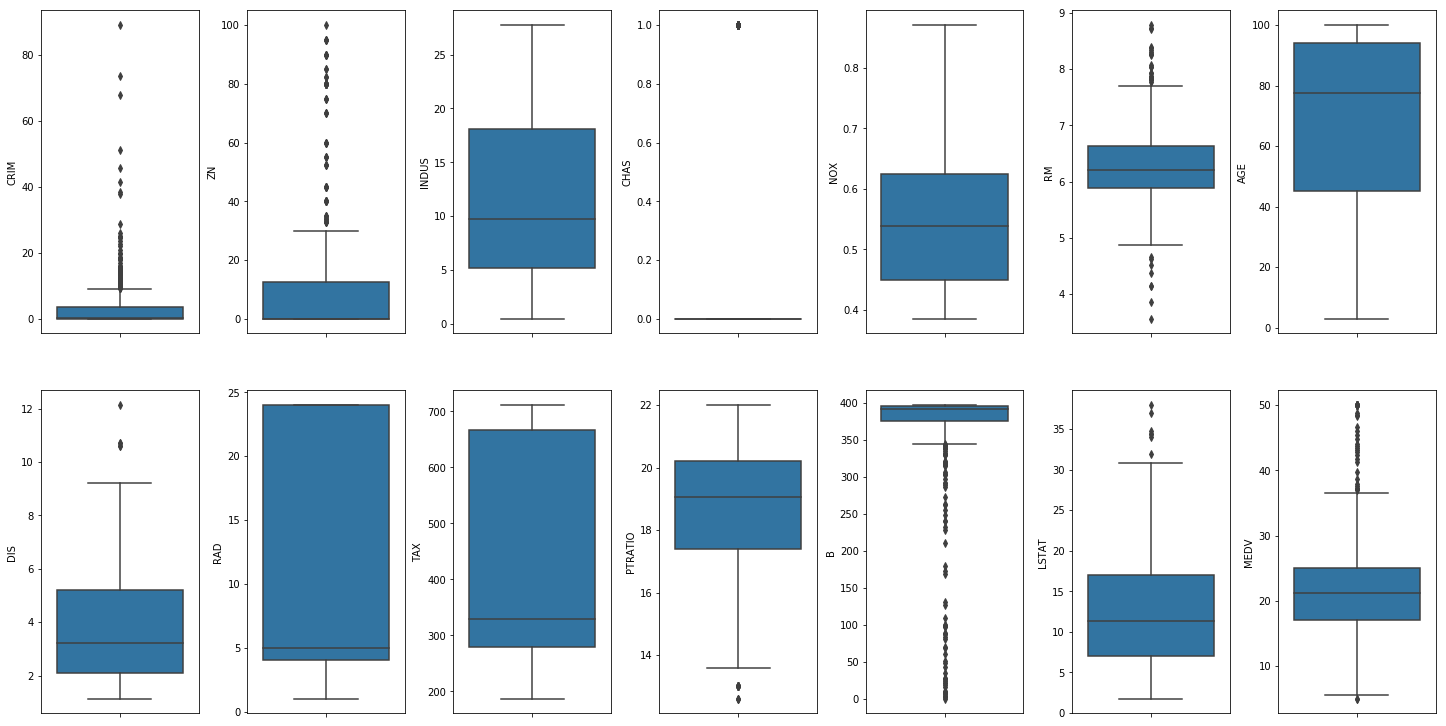

In [5]:
import seaborn as sns
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.plot()

#### CRIM, ZN and B have a lot of outliers. Moreover, 'CRIM', 'ZN',  and 'DIS' appear quite skewed towards smaller values.

### Finding NaNs

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Checking the distribution of MEDV

1. Using a histogram

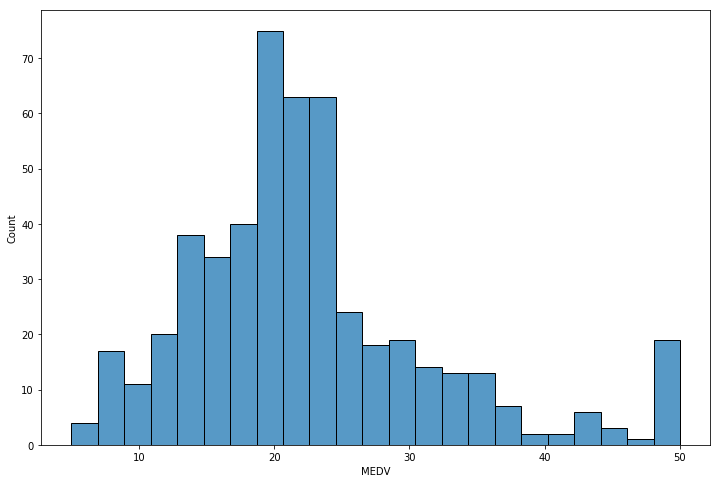

In [7]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='MEDV')
plt.show()

2. Using a Q-Q plot

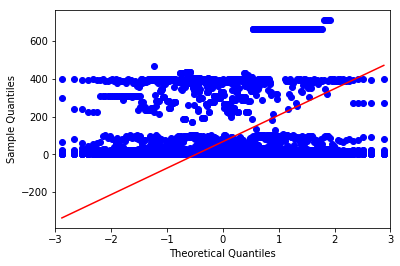

In [8]:
# QQ Plot

from statsmodels.graphics.gofplots import qqplot

qqplot(df, line='s')
plt.show()

3. Using a statistical test : Shapiro-Wilk Test

In [10]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

stat, p = shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpretation
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.519, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\hmtmh\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Distribution of all features as histograms

[]

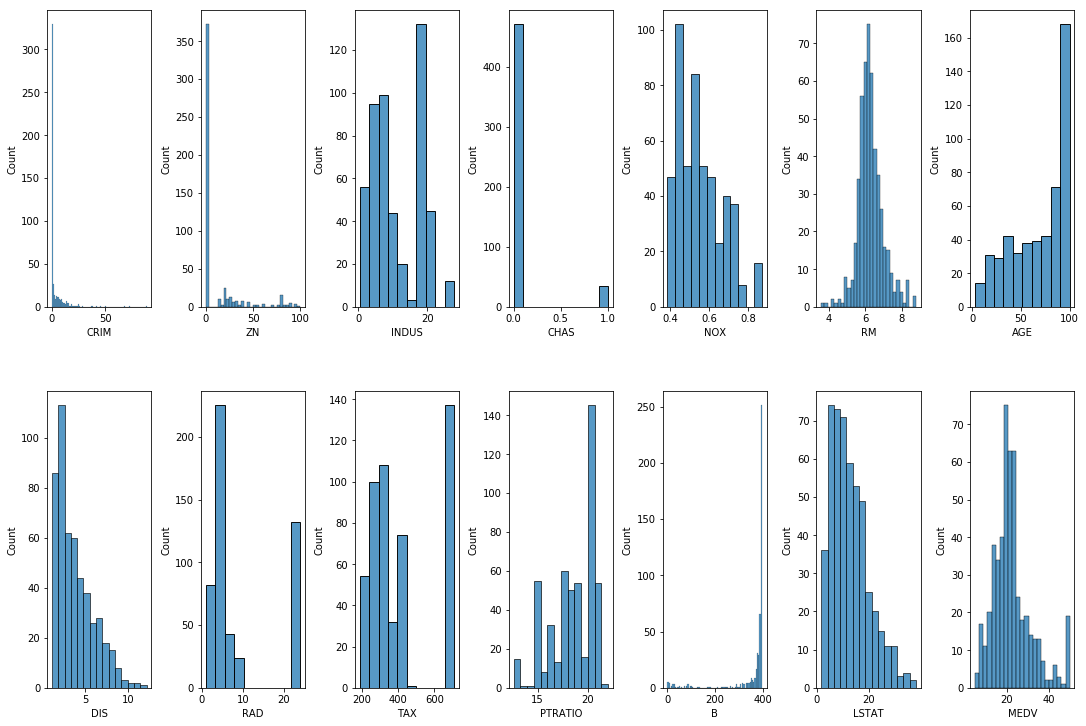

In [11]:
# df.hist(sharex=False, sharey=False, xlabelsize =1, ylabelsize =1)
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
# plt.show()

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 10)) #ncols=5, nrows=3, figsize=(15, 10))
index = 0
axs = axs.flatten()

for k,v in df.items():
    sns.histplot(data=df, x=k, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.plot()

## Cheking the skewness of each feature
### Many Machine learning algorithms assume a Gaussian distribution. Once we know that there are skewed data, we can improve the accuracy of the model by transforming data.

- positive (right) skew
- negative (left) skew
- values closer to zero (less) skew


In [12]:
skw = df.skew()
print(skw)

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64


#### Only 'RM' seem to have a normal distribution. All other data is skewed. 'NOX' and 'LSTAT' may be skewed Gaussian distributions.

## Checking correlations

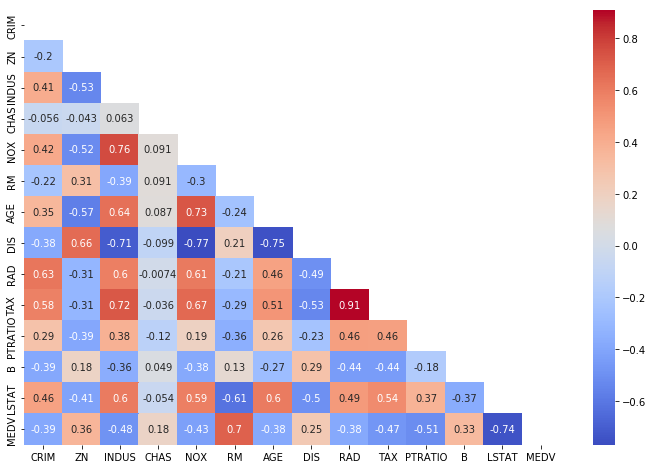

In [14]:
mask = np.zeros_like(df.corr())
tri_ind = np.triu_indices_from(mask)
mask[tri_ind] = True
plt.figure(figsize=[12, 8])
sns.heatmap(data=df.corr(method  = 'pearson'), mask=mask, annot=True, cmap='coolwarm')

#### 'RAD' & 'TAX' has a colinearity of 0.91.

###  Use the Pandas method corr() to find the most correlated feature with MEDV.

In [15]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

#### Determine whether houses near Charles river have or haven't more price outliers

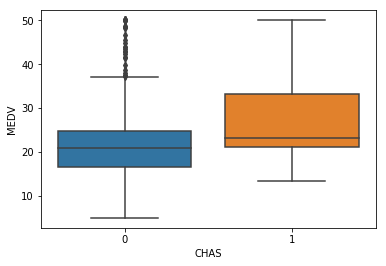

In [16]:
sns.boxplot(x='CHAS', y='MEDV', data=df)

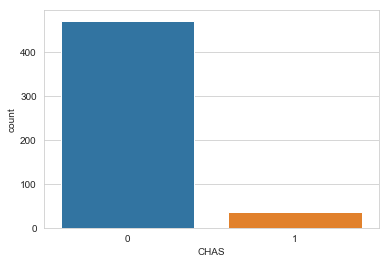

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df)

In [19]:
# checking the data types
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


## Variable selection & Data split

### Import necessary packages

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

print("done")

done


In [26]:
# DATA SPLIT

# removed 'RAD' from features as it is highly colinear with 'TAX'

features_x = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
X_var = df[features_x]
Y_var = df['MEDV']

no_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

X_train, X_test, Y_train, Y_test = train_test_split(X_var, Y_var, test_size = 0.2, random_state = seed)


In [35]:
# SPOT-CHECK Algorithms

models = []

models.append(('LR',LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM',GradientBoostingRegressor()))
models.append(('RF',RandomForestRegressor(n_estimators =10)))

In [36]:
# evaluate each model using MSE. We take the mean and standard deviation of MSE as we do 10-fold cross-validation.

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
  
    
cross_vals = []
model_names = []

for name,model in models:
    kfold = KFold(n_splits = no_folds, random_state = seed, shuffle = True)
    crosVal =cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    cross_vals.append(crosVal)
    model_names.append(name)
    
    output = "%s : %f (%f) "%(name, crosVal.mean(), crosVal.std())
    print(output)
    


LR : -26.023705 (12.735994) 
LASSO : -29.137065 (13.380817) 
EN : -30.676229 (13.680067) 
KNN : -32.891230 (12.731937) 
CART : -28.084203 (17.078336) 
SVR : -80.687348 (33.846042) 
GBM : -11.565207 (8.543490) 
RF : -15.213454 (10.545514) 


#### This dataset has different scales. So let us standradize the dataset and evaluate the algorithms to check if there is any improvement.

In [37]:
# Standradize the dataset
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

pipelines = []

pipelines.append(('ScaledLR',Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLasso',Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledDTree',Pipeline([('Scaler', StandardScaler()),('DTree',DecisionTreeRegressor())])))
pipelines.append(('ScaleSVM',Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))

# ensemble methods
pipelines.append(('ScaledGBM',Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
pipelines.append(('ScaledRF',Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(n_estimators =10))])))

scaled_cross_vals = []
scaled_model_names = []

for name,model in pipelines:
    kfold = KFold(n_splits = no_folds, random_state = seed, shuffle = True)
    crosVal =cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    scaled_cross_vals.append(crosVal)
    scaled_model_names.append(name)
    
    output = "%s : %f (%f) "%(name, crosVal.mean(), crosVal.std())
    print(output)

ScaledLR : -26.023705 (12.735994) 
ScaledLasso : -27.319231 (11.871161) 
ScaledEN : -29.231894 (13.741122) 
ScaledKNN : -16.255078 (8.093801) 
ScaledDTree : -27.691052 (16.084341) 
ScaleSVM : -26.649035 (15.169497) 
ScaledGBM : -11.532677 (8.599890) 
ScaledRF : -14.377986 (9.593081) 


#### We can clearly see that MSE have reduced in all models. And, 'GBM' has the lowest MSE.

## Tuning the 'GBM'

In [46]:
def print_results(results):
    print('BEST PARAMS :{}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [47]:
gb = GradientBoostingRegressor()

parameters = {
    'n_estimators':[5,50,250,500]}
# None - let it go as deep as it wants upto some tolerance which would depend the function

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train,Y_train)

print_results(cv)

BEST PARAMS :{'n_estimators': 250}

0.508 (+/-0.099) for {'n_estimators': 5}
0.861 (+/-0.104) for {'n_estimators': 50}
0.874 (+/-0.093) for {'n_estimators': 250}
0.873 (+/-0.089) for {'n_estimators': 500}


## Evaluating the models

In [69]:
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

scaler = StandardScaler().fit(X_train)

rescaledX = scaler.transform(X_train) # transform the training dataset
rescaledValidationX = scaler.transform(X_test) # transform the validation dataset


In [70]:
# Run only once
# models.append(('GBM_Best',GradientBoostingRegressor(random_state = seed, n_estimators = 50)))

In [71]:
all_evs = []
all_r2 = []
model_names = []

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric


for name,model in models:
    model.fit(rescaledX, Y_train)
    yhat = model.predict(rescaledValidationX)
    
   # print(yhat)
    evs1 = evs(Y_test, yhat)
    r21 = r2(Y_test, yhat)

    all_evs.append(evs1)
    all_r2.append(r21)
    model_names.append(name)
    
#     output = "%s : %f  %f "%(name, evs1, r21)
#     print(output)
    

In [72]:
model = pd.Series(model_names) # model name
evs = pd.Series(all_evs) # explained variance score
r2 = pd.Series(all_r2) # 

model_dict = { 'Regression': model, 'Explained Variance Scores': evs, 'R^2':r2 }
model_df = pd.DataFrame(model_dict)
model_df.set_index(pd.Index([1, 2, 3 ,4,5,6,7,8,9,10]))


,Regression,Explained Variance Scores,R^2
1,LR,0.499182,0.499142
2,LASSO,0.505754,0.504922
3,EN,0.499646,0.499637
4,KNN,0.770049,0.755499
5,CART,0.687598,0.681102
6,SVR,0.611950,0.603646
7,GBM,0.804589,0.802679
8,RF,0.691859,0.689751
9,GBM_Best,0.805943,0.803839
10,GBM_Best,0.805943,0.803839


# We conclude that 'Gradient Boosting Regressor' is the best model to predict housing prices with the given dataset. 